In [21]:
import pandas as pd
import os
import numpy as np
import plotly as py
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statistics
import scipy.stats as stats
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statsmodels.graphics.regressionplots import plot_partregress_grid
os.chdir("E:\Ginu_StudyMaterials\Sem2\Dissertation\Data")

In [22]:
data = pd.read_csv("PRP_FOR_DUB.csv", na_values =("N/A", "NA", "--", " "), encoding = 'unicode_escape')
data

,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon,location,year,month
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2010,1
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,NewHouse,greater than or equal to 38 sq metres and less...,Leinster,52.998458,-7.398034,Outside,2010,1
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2010,1
3,2010-01-04,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand,NaN,Leinster,53.649784,-6.588529,Outside,2010,1
4,2010-01-04,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand,NaN,Leinster,52.651022,-7.248495,Outside,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515787,2022-01-28,"Lacken, Multyfarnham, Mullingar",NaN,Westmeath,305000,No,No,Second-Hand,NaN,Leinster,53.557790,-7.347856,Outside,2022,1
515788,2022-01-28,"Larch Hill, Colman, Fethard",NaN,Tipperary,300000,No,No,Second-Hand,NaN,Munster,52.684821,-7.898128,Outside,2022,1
515789,2022-01-28,"Sherrys Wood, Bellewstown, Co Meath",NaN,Meath,450000,No,No,Second-Hand,NaN,Leinster,53.649784,-6.588529,Outside,2022,1
515790,2022-01-28,"St Judes, Stoneyford, Kilkenny",NaN,Kilkenny,242000,No,No,Second-Hand,NaN,Leinster,52.651022,-7.248495,Outside,2022,1


In [23]:
values=["Dublin"]
dub_data = data[data["location"].isin(values)]
dub_data

,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon,location,year,month
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2010,1
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2010,1
5,2010-01-04,"12 Sallymount Avenue, Ranelagh",NaN,Dublin,425000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2010,1
11,2010-01-04,"206 Philipsburgh Avenue, Marino, Dublin 3",NaN,Dublin,430000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2010,1
12,2010-01-04,"22 Laverna Way, Castleknock, Dublin 15",NaN,Dublin,355000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515765,2022-01-28,"22 Stanford, Ardilea, Clonskeagh Dublin 14",Dublin 14,Dublin,425000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2022,1
515767,2022-01-28,"26 Melville Court, Cityside, Finglas Dublin 11",Dublin 11,Dublin,270000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2022,1
515772,2022-01-28,"52 Park Dr Grove, Castleknock, Dublin 15",Dublin 15,Dublin,386000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2022,1
515777,2022-01-28,"Apartment 7, Parkgate Place, Parkgate Street",NaN,Dublin,367500,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,Dublin,2022,1


In [91]:
dub_data.to_csv("PRP_Dublin.csv", index=False)

# Statistical Analyses

In [ ]:
#### MLR

In [24]:
for col in dub_data.columns:
    print(col)

date_of_sale
address
postal_code
county
price
FMP
VAT_exclusive
property_description
property_size_description
province
lat
lon
location
year
month


In [30]:
counties = dub_data['county'].unique()
counties

array(['Dublin'], dtype=object)

In [31]:
rppr1 = dub_data.copy()
rppr1.drop(columns =['date_of_sale','address','VAT_exclusive','FMP','county','location','province'], inplace=True)

In [32]:
#rppr1["location_Dublin"]=pd.get_dummies(rppr1["location"])["Dublin"]

In [33]:
rppr1["property_new"]=pd.get_dummies(rppr1["property_description"])["NewHouse"]

In [34]:
rppr1["postal_code_Dublin 14"]=pd.get_dummies(rppr1["postal_code"])["Dublin 14"]
rppr1["postal_code_Dublin 2"]=pd.get_dummies(rppr1["postal_code"])["Dublin 2"]
rppr1["postal_code_Dublin 13"]=pd.get_dummies(rppr1["postal_code"])["Dublin 13"]
rppr1["postal_code_Dublin 12"]=pd.get_dummies(rppr1["postal_code"])["Dublin 12"]
rppr1["postal_code_Dublin 4"]=pd.get_dummies(rppr1["postal_code"])["Dublin 4"]
rppr1["postal_code_Dublin 11"]=pd.get_dummies(rppr1["postal_code"])["Dublin 11"]
rppr1["postal_code_Dublin 9"]=pd.get_dummies(rppr1["postal_code"])["Dublin 9"]
rppr1["postal_code_Dublin 10"]=pd.get_dummies(rppr1["postal_code"])["Dublin 10"]
rppr1["postal_code_Dublin 15"]=pd.get_dummies(rppr1["postal_code"])["Dublin 15"]
rppr1["postal_code_Dublin 22"]=pd.get_dummies(rppr1["postal_code"])["Dublin 22"]
rppr1["postal_code_Dublin 5"]=pd.get_dummies(rppr1["postal_code"])["Dublin 5"]
rppr1["postal_code_Dublin 18"]=pd.get_dummies(rppr1["postal_code"])["Dublin 18"]
rppr1["postal_code_Dublin 6"]=pd.get_dummies(rppr1["postal_code"])["Dublin 6"]
rppr1["postal_code_Dublin 6w"]=pd.get_dummies(rppr1["postal_code"])["Dublin 6w"]
rppr1["postal_code_Dublin 17"]=pd.get_dummies(rppr1["postal_code"])["Dublin 17"]
rppr1["postal_code_Dublin 16"]=pd.get_dummies(rppr1["postal_code"])["Dublin 16"]
rppr1["postal_code_Dublin 8"]=pd.get_dummies(rppr1["postal_code"])["Dublin 8"]
rppr1["postal_code_Dublin 3"]=pd.get_dummies(rppr1["postal_code"])["Dublin 3"]
rppr1["postal_code_Dublin 1"]=pd.get_dummies(rppr1["postal_code"])["Dublin 1"]
rppr1["postal_code_Dublin 17"]=pd.get_dummies(rppr1["postal_code"])["Dublin 17"]
rppr1["postal_code_Dublin 20"]=pd.get_dummies(rppr1["postal_code"])["Dublin 20"]

In [54]:
from numpy import sqrt
log_price = np.log(rppr1['price'])
transform  = sqrt(log_price)


In [55]:
X = rppr1[["property_new","year","lat","lon","postal_code_Dublin 14","postal_code_Dublin 2","postal_code_Dublin 13","postal_code_Dublin 12","postal_code_Dublin 4","postal_code_Dublin 11","postal_code_Dublin 9","postal_code_Dublin 10","postal_code_Dublin 15","postal_code_Dublin 22","postal_code_Dublin 5","postal_code_Dublin 18","postal_code_Dublin 6","postal_code_Dublin 6w","postal_code_Dublin 17","postal_code_Dublin 16","postal_code_Dublin 8","postal_code_Dublin 3","postal_code_Dublin 1","postal_code_Dublin 17","postal_code_Dublin 20"]]
X = sm.add_constant(X)
y = transform
#X.head(20)

In [56]:
model_full_mlr = sm.OLS(y, X).fit()

In [57]:
#fitted values
model_fitted_vals = model_full_mlr.fittedvalues
#model residuals
model_residuals = model_full_mlr.resid
#standardised residuals
model_norm_residuals = model_full_mlr.get_influence().resid_studentized_internal

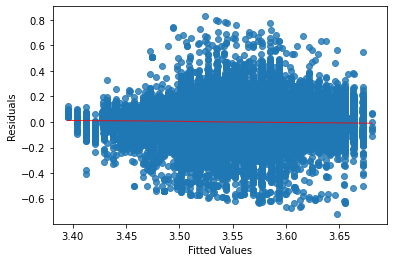

In [58]:
sns.regplot(x=model_fitted_vals,y=model_residuals,
 ci=False,lowess=True,
 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

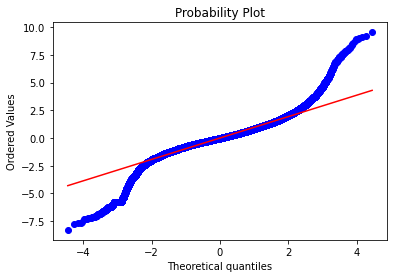

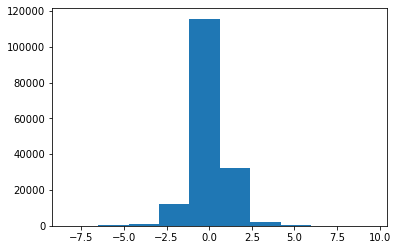

In [59]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

plt.hist(model_norm_residuals)
plt.show()

In [60]:
from statsmodels.formula.api import ols
model_full_mlr1 = ols('log_price ~ lat+lon+C(year)+C(postal_code)+C(property_description)', data=rppr1).fit()
model_full_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     1114.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:58:22   Log-Likelihood:                -85320.
No. Observations:               96825   AIC:                         1.707e+05
Df Residuals:                   96790   BIC:                         1.710e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0042   5.72e-06    738.484      0.000       0.004       0.004
C(year)[T.2011]                           -0.1707      0.018     -9.306      0.000      -0.207      -0.135
C(year)[T.2012]                           -0.3598      0.017    -21.785      0.000      -0.392      -0.327
C(year)[T.2013]                           -0.3115      0.014    -21.745      0.000      -0.340      -0.283
C(year)[T.2014]                            0.0155      0.013      1.161      0.246      -0.011       0.042
C(year)[T.2015]                            0.0426      0.013      3.282      0.001       0.017       0.068
C(year)[T.2016]                            0.1505      0.013     11.594      0.000       0.125       0.176
C(year)[T.2017]                            0.2476      0.013     19.247      0.000       0.222       0.273
C(year)[T.2018]                            0.3112      0.013     24.226      0.000       0.286       0.336
C(year)[T.2019]                            0.3415      0.013     26.628      0.000       0.316       0.367
C(year)[T.2020]                            0.3530      0.013     26.979      0.000       0.327       0.379
C(year)[T.2021]                            0.4218      0.013     32.555      0.000       0.396       0.447
C(year)[T.2022]                            0.4276      0.033     12.810      0.000       0.362       0.493
C(postal_code)[T.Dublin 10]               -0.4472      0.019    -23.316      0.000      -0.485      -0.410
C(postal_code)[T.Dublin 11]               -0.1914      0.013    -14.493      0.000      -0.217      -0.166
C(postal_code)[T.Dublin 12]                0.0959      0.013      7.152      0.000       0.070       0.122
C(postal_code)[T.Dublin 13]                0.2814      0.013     21.027      0.000       0.255       0.308
C(postal_code)[T.Dublin 14]                0.6939      0.014     51.312      0.000       0.667       0.720
C(postal_code)[T.Dublin 15]                0.0859      0.012      7.312      0.000       0.063       0.109
C(postal_code)[T.Dublin 16]                0.5269      0.014     38.632      0.000       0.500       0.554
C(postal_code)[T.Dublin 17]               -0.2279      0.020    -11.206      0.000      -0.268      -0.188
C(postal_code)[T.Dublin 18]                0.5082      0.013     40.264      0.000       0.483       0.533
C(postal_code)[T.Dublin 2]                 0.3986      0.017     23.379      0.000       0.365       0.432
C(postal_code)[T.Dublin 20]                0.0559      0.020      2.781      0.005       0.016       0.095
C(postal_code)[T.Dublin 22]               -0.1576      0.015    -10.484      0.000      -0.187      -0.128
C(postal_code)[T.Dublin 24]               -0.0353      0.013     -2.797      0.005     

#### SLR

In [61]:
rppr1 = dub_data.copy()
log_price = np.log(rppr1['price'])
transform  = sqrt(log_price)

In [ ]:
rppr1["postal_code_Dublin 14"]=pd.get_dummies(rppr1["postal_code"])["Dublin 14"]
rppr1["postal_code_Dublin 2"]=pd.get_dummies(rppr1["postal_code"])["Dublin 2"]
rppr1["postal_code_Dublin 13"]=pd.get_dummies(rppr1["postal_code"])["Dublin 13"]
rppr1["postal_code_Dublin 12"]=pd.get_dummies(rppr1["postal_code"])["Dublin 12"]
rppr1["postal_code_Dublin 4"]=pd.get_dummies(rppr1["postal_code"])["Dublin 4"]
rppr1["postal_code_Dublin 11"]=pd.get_dummies(rppr1["postal_code"])["Dublin 11"]
rppr1["postal_code_Dublin 9"]=pd.get_dummies(rppr1["postal_code"])["Dublin 9"]
rppr1["postal_code_Dublin 10"]=pd.get_dummies(rppr1["postal_code"])["Dublin 10"]
rppr1["postal_code_Dublin 15"]=pd.get_dummies(rppr1["postal_code"])["Dublin 15"]
rppr1["postal_code_Dublin 22"]=pd.get_dummies(rppr1["postal_code"])["Dublin 22"]
rppr1["postal_code_Dublin 5"]=pd.get_dummies(rppr1["postal_code"])["Dublin 5"]
rppr1["postal_code_Dublin 18"]=pd.get_dummies(rppr1["postal_code"])["Dublin 18"]
rppr1["postal_code_Dublin 6"]=pd.get_dummies(rppr1["postal_code"])["Dublin 6"]
rppr1["postal_code_Dublin 6w"]=pd.get_dummies(rppr1["postal_code"])["Dublin 6w"]
rppr1["postal_code_Dublin 17"]=pd.get_dummies(rppr1["postal_code"])["Dublin 17"]
rppr1["postal_code_Dublin 16"]=pd.get_dummies(rppr1["postal_code"])["Dublin 16"]
rppr1["postal_code_Dublin 8"]=pd.get_dummies(rppr1["postal_code"])["Dublin 8"]
rppr1["postal_code_Dublin 3"]=pd.get_dummies(rppr1["postal_code"])["Dublin 3"]
rppr1["postal_code_Dublin 1"]=pd.get_dummies(rppr1["postal_code"])["Dublin 1"]
rppr1["postal_code_Dublin 17"]=pd.get_dummies(rppr1["postal_code"])["Dublin 17"]
rppr1["postal_code_Dublin 20"]=pd.get_dummies(rppr1["postal_code"])["Dublin 20"]

In [70]:
# Try SLR
import numpy as np
X = rppr1[["postal_code_Dublin 14","postal_code_Dublin 2","postal_code_Dublin 13","postal_code_Dublin 12","postal_code_Dublin 4","postal_code_Dublin 11","postal_code_Dublin 9","postal_code_Dublin 10","postal_code_Dublin 15","postal_code_Dublin 22","postal_code_Dublin 5","postal_code_Dublin 18","postal_code_Dublin 6","postal_code_Dublin 6w","postal_code_Dublin 17","postal_code_Dublin 16","postal_code_Dublin 8","postal_code_Dublin 3","postal_code_Dublin 1","postal_code_Dublin 17","postal_code_Dublin 20"]]
X = sm.add_constant(X)
y = transform
model_slr = sm.OLS(y, X).fit()



In [71]:
#fitted values
model_fitted_vals = model_slr.fittedvalues
#model residuals
model_residuals = model_slr.resid
#standardised residuals
model_norm_residuals = model_slr.get_influence().resid_studentized_internal

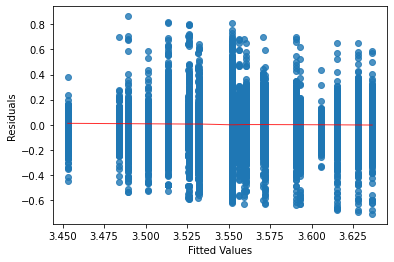

In [72]:
sns.regplot(x=model_fitted_vals,y=model_residuals,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

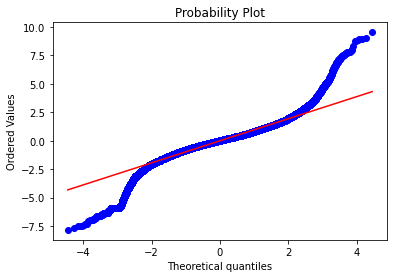

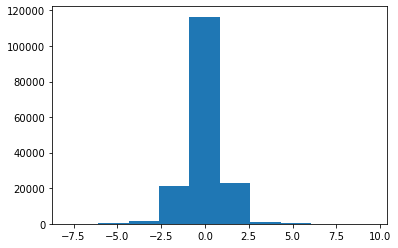

In [74]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

plt.hist(model_norm_residuals)
plt.show()

In [75]:
from statsmodels.formula.api import ols
model_full_mlr1 = ols('log_price ~ C(postal_code)', data=rppr1).fit()
model_full_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     1099.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:01:20   Log-Likelihood:                -90954.
No. Observations:               96825   AIC:                         1.820e+05
Df Residuals:                   96803   BIC:                         1.822e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      12.3552      0.011   1119.318      0.000      12.334      12.377
C(postal_code)[T.Dublin 10]    -0.4243      0.020    -20.879      0.000      -0.464      -0.384
C(postal_code)[T.Dublin 11]    -0.1709      0.014    -12.223      0.000      -0.198      -0.143
C(postal_code)[T.Dublin 12]     0.1221      0.014      8.604      0.000       0.094       0.150
C(postal_code)[T.Dublin 13]     0.3297      0.014     23.336      0.000       0.302       0.357
C(postal_code)[T.Dublin 14]     0.7217      0.014     50.397      0.000       0.694       0.750
C(postal_code)[T.Dublin 15]     0.1306      0.012     10.538      0.000       0.106       0.155
C(postal_code)[T.Dublin 16]     0.5594      0.014     38.753      0.000       0.531       0.588
C(postal_code)[T.Dublin 17]    -0.2118      0.022     -9.843      0.000      -0.254      -0.170
C(postal_code)[T.Dublin 18]     0.5427      0.013     40.758      0.000       0.517       0.569
C(postal_code)[T.Dublin 2]      0.4033      0.018     22.324      0.000       0.368       0.439
C(postal_code)[T.Dublin 20]     0.0825      0.021      3.880      0.000       0.041       0.124
C(postal_code)[T.Dublin 22]    -0.0914      0.016     -5.742      0.000      -0.123      -0.060
C(postal_code)[T.Dublin 24]     0.0399      0.013      2.995      0.003       0.014       0.066
C(postal_code)[T.Dublin 3]      0.4124      0.015     28.371      0.000       0.384       0.441
C(postal_code)[T.Dublin 4]      0.8159      0.014     59.150      0.000       0.789       0.843
C(postal_code)[T.Dublin 5]      0.3172      0.015     21.288      0.000       0.288       0.346
C(postal_code)[T.Dublin 6]      0.8800      0.015     60.569      0.000       0.852       0.908
C(postal_code)[T.Dublin 6w]     0.6512      0.025     26.119      0.000       0.602       0.700
C(postal_code)[T.Dublin 7]      0.1673      0.014     12.044      0.000       0.140       0.195
C(postal_code)[T.Dublin 8]      0.0895      0.014      6.522      0.000       0.063       0.116
C(postal_code)[T.Dublin 9]      0.2975      0.014     21.498      0.000       0.270       0.325
==============================================================================
Omnibus:                    16165.422   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           311906.290
Skew:                          -0.192   Prob(JB):                         0.00
Kurtosis:                      11.784   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ML

In [80]:
df1 = dub_data.copy()
df1.drop(columns = ['postal_code', 'property_size_description'], inplace=True)
X1 = pd.get_dummies(df1[[ 'county', 'FMP', 'VAT_exclusive','property_description', 'province', 'month', 'location']])


In [81]:
x3 = df1[['date_of_sale','price']]
x2=pd.concat([df1,X1], axis =1)

In [82]:
x2

,date_of_sale,address,county,price,FMP,VAT_exclusive,property_description,province,lat,lon,...,month,county_Dublin,FMP_No,FMP_Yes,VAT_exclusive_No,VAT_exclusive_Yes,property_description_NewHouse,property_description_Second-Hand,province_Leinster,location_Dublin
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,1,1,0,1,0,0,1,1,1
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,1,1,0,1,0,0,1,1,1
5,2010-01-04,"12 Sallymount Avenue, Ranelagh",Dublin,425000,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,1,1,0,1,0,0,1,1,1
11,2010-01-04,"206 Philipsburgh Avenue, Marino, Dublin 3",Dublin,430000,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,1,1,0,1,0,0,1,1,1
12,2010-01-04,"22 Laverna Way, Castleknock, Dublin 15",Dublin,355000,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,1,1,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515765,2022-01-28,"22 Stanford, Ardilea, Clonskeagh Dublin 14",Dublin,425000,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,1,1,0,1,0,0,1,1,1
515767,2022-01-28,"26 Melville Court, Cityside, Finglas Dublin 11",Dublin,270000,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,1,1,0,1,0,0,1,1,1
515772,2022-01-28,"52 Park Dr Grove, Castleknock, Dublin 15",Dublin,386000,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,1,1,0,1,0,0,1,1,1
515777,2022-01-28,"Apartment 7, Parkgate Place, Parkgate Street",Dublin,367500,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,1,1,0,1,0,0,1,1,1


In [83]:
x3 = x2.copy()
x = x3.drop(columns = ['date_of_sale','address', 'price','county','FMP','VAT_exclusive','property_description', 'location', 'province'],axis=1)
y = x3[['price']]
x=x.values
y=y.values

In [86]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split( x, y,test_size=0.2, random_state=60)

In [87]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data_train, target_train)
reg.score(data_test, target_test)

0.00598889209314557

In [88]:
# Make predictions using the testing set
data_y_pred = reg.predict(data_test)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# The coefficients
print('Coefficients: \n', reg.coef_)


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, data_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, data_y_pred))

print("MAE : %.2f" % mean_absolute_error(target_test, data_y_pred))

Coefficients: 
 [[-9.60319515e+08 -1.14351268e+11  2.52167514e+04 -1.37151468e+17
   1.37151468e+17  7.97357865e+14 -1.14492657e+15 -1.14492657e+15
   2.48985186e+13  2.48985184e+13 -2.96873961e+14 -2.96873961e+14
   0.00000000e+00  0.00000000e+00]]
Mean squared error: 1378065397784.18
Variance score: 0.01
MAE : 233286.01


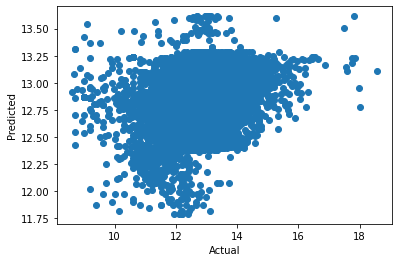

In [90]:
import numpy as np
plt.scatter(np.log(target_test),np.log(data_y_pred));
plt.xlabel('Actual');
plt.ylabel('Predicted');